# Phase-3
## Exploratory Data Analysis
### Data Exploration and analysis for the stated problem & Given Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Read the dataset into a Pandas DataFrame
df = pd.read_csv('ContinousDataset.csv')

In [2]:
df.head()

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2,Team1_runs,Team2_runs,Total_runs
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First,280,157,437
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First,270,177,447
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second,240,161,401
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First,299,194,493
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second,151,259,410


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     7494 non-null   int64 
 1   Scorecard      7494 non-null   object
 2   Team 1         7494 non-null   object
 3   Team 2         7494 non-null   object
 4   Margin         7494 non-null   object
 5   Ground         7494 non-null   object
 6   Match Date     7494 non-null   object
 7   Winner         7494 non-null   object
 8   Host_Country   7364 non-null   object
 9   Venue_Team1    7494 non-null   object
 10  Venue_Team2    7494 non-null   object
 11  Innings_Team1  7494 non-null   object
 12  Innings_Team2  7494 non-null   object
 13  Team1_runs     7494 non-null   int64 
 14  Team2_runs     7494 non-null   int64 
 15  Total_runs     7494 non-null   int64 
dtypes: int64(4), object(12)
memory usage: 936.9+ KB


### Data Cleaning

In [4]:
df[df['Host_Country'].isna()].head()

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2,Team1_runs,Team2_runs,Total_runs
255,256,ODI # 267,India,Australia,Winner1stInning,New Delhi,"Sep 28, 1984",Australia,NaN,Neutral,Neutral,Second,First,196,213,409
661,664,ODI # 688,India,South Africa,Winner2ndInning,New Delhi,"Nov 14, 1991",South Africa,NaN,Neutral,Neutral,First,Second,155,219,374
817,820,ODI # 855,India,South Africa,Winner1stInning,Mohali,"Nov 22, 1993",India,NaN,Neutral,Neutral,First,Second,214,262,476
1036,1040,ODI # 1082,Australia,West Indies,Winner1stInning,Mohali,"Mar 14, 1996",Australia,NaN,Neutral,Neutral,First,Second,231,168,399
1041,1045,ODI # 1088,Pakistan,Sri Lanka,Winner1stInning,Singapore,"Apr 2, 1996",Sri Lanka,NaN,Neutral,Neutral,Second,First,263,300,563


### Handling null values on "Host_Country" as "Neutral" since Venue data of both teams says Neutral

In [5]:
df['Host_Country'] = df['Host_Country'].fillna('Neutral')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     7494 non-null   int64 
 1   Scorecard      7494 non-null   object
 2   Team 1         7494 non-null   object
 3   Team 2         7494 non-null   object
 4   Margin         7494 non-null   object
 5   Ground         7494 non-null   object
 6   Match Date     7494 non-null   object
 7   Winner         7494 non-null   object
 8   Host_Country   7494 non-null   object
 9   Venue_Team1    7494 non-null   object
 10  Venue_Team2    7494 non-null   object
 11  Innings_Team1  7494 non-null   object
 12  Innings_Team2  7494 non-null   object
 13  Team1_runs     7494 non-null   int64 
 14  Team2_runs     7494 non-null   int64 
 15  Total_runs     7494 non-null   int64 
dtypes: int64(4), object(12)
memory usage: 936.9+ KB


## 1. Univariate Analysis

# Bar Plot:
* Visualize the number of matches won by each team.

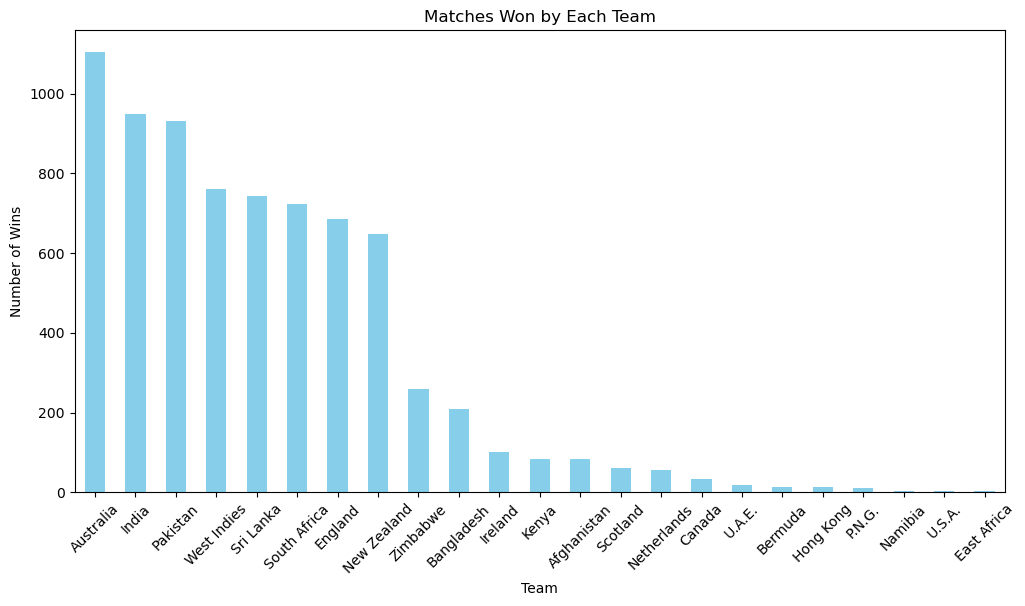

In [6]:
team_wins = df['Winner'].value_counts()

plt.figure(figsize=(12, 6))
team_wins.plot(kind='bar', color='skyblue')
plt.title('Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

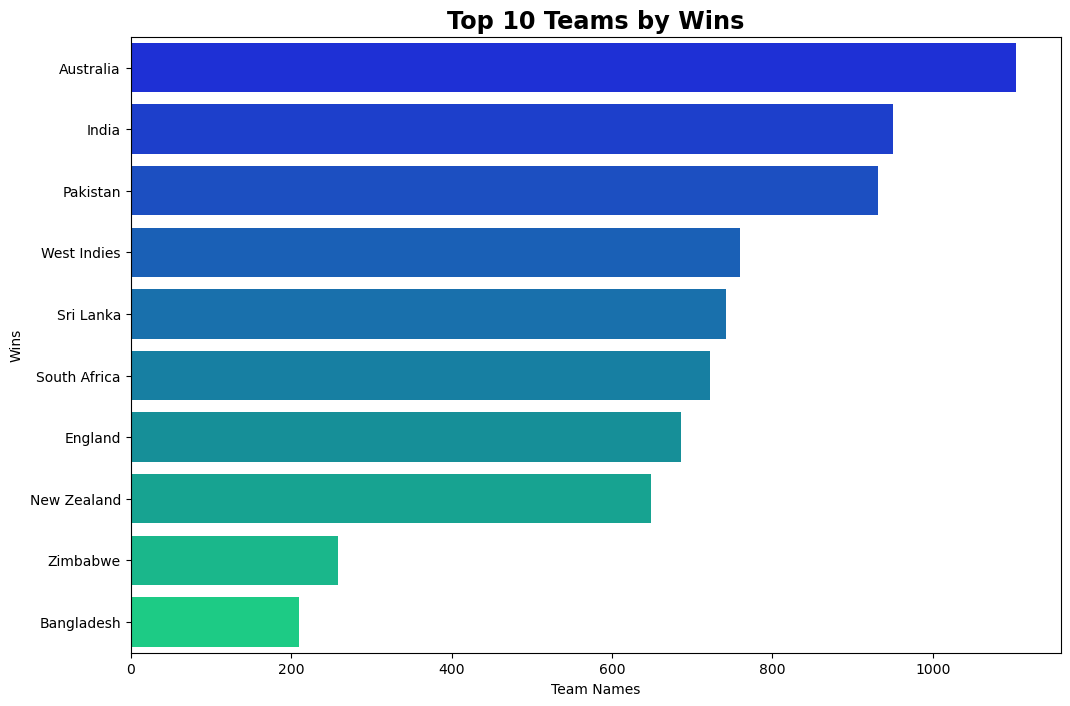

In [7]:
winning_team = df['Winner'].value_counts().index[:10]
win_count = df['Winner'].value_counts().values[:10]

plt.figure(figsize=(12,8))
ax = sns.barplot(y = winning_team , x = win_count, orient='h', palette='winter')
plt.xlabel(xlabel='Team Names')
plt.ylabel(ylabel='Wins')
plt.title("Top 10 Teams by Wins", fontdict = {'size' : 'xx-large', 'fontweight' : 'bold'})
plt.show()

### Insight 1 : Australia has won most numbers of matches 

In [8]:
team1_by_mat = df.groupby('Team 1').agg({'Scorecard':'count'}).reset_index()
team2_by_mat = df.groupby('Team 2').agg({'Scorecard':'count'}).reset_index()

team1_by_mat.rename(columns={"Team 1": "idx_team", "Scorecard": "Matches"}, inplace = True)
team2_by_mat.rename(columns={"Team 2": "idx_team", "Scorecard": "Matches"}, inplace = True)

total_mat = pd.concat([team1_by_mat, team2_by_mat]).groupby(['idx_team']).sum().reset_index()
total_mat

,idx_team,Matches
0,Afghanistan,162
1,Australia,1718
2,Bangladesh,656
3,Bermuda,72
4,Canada,150
5,East Africa,8
6,England,1328
7,Hong Kong,36
8,India,1760
9,Ireland,226


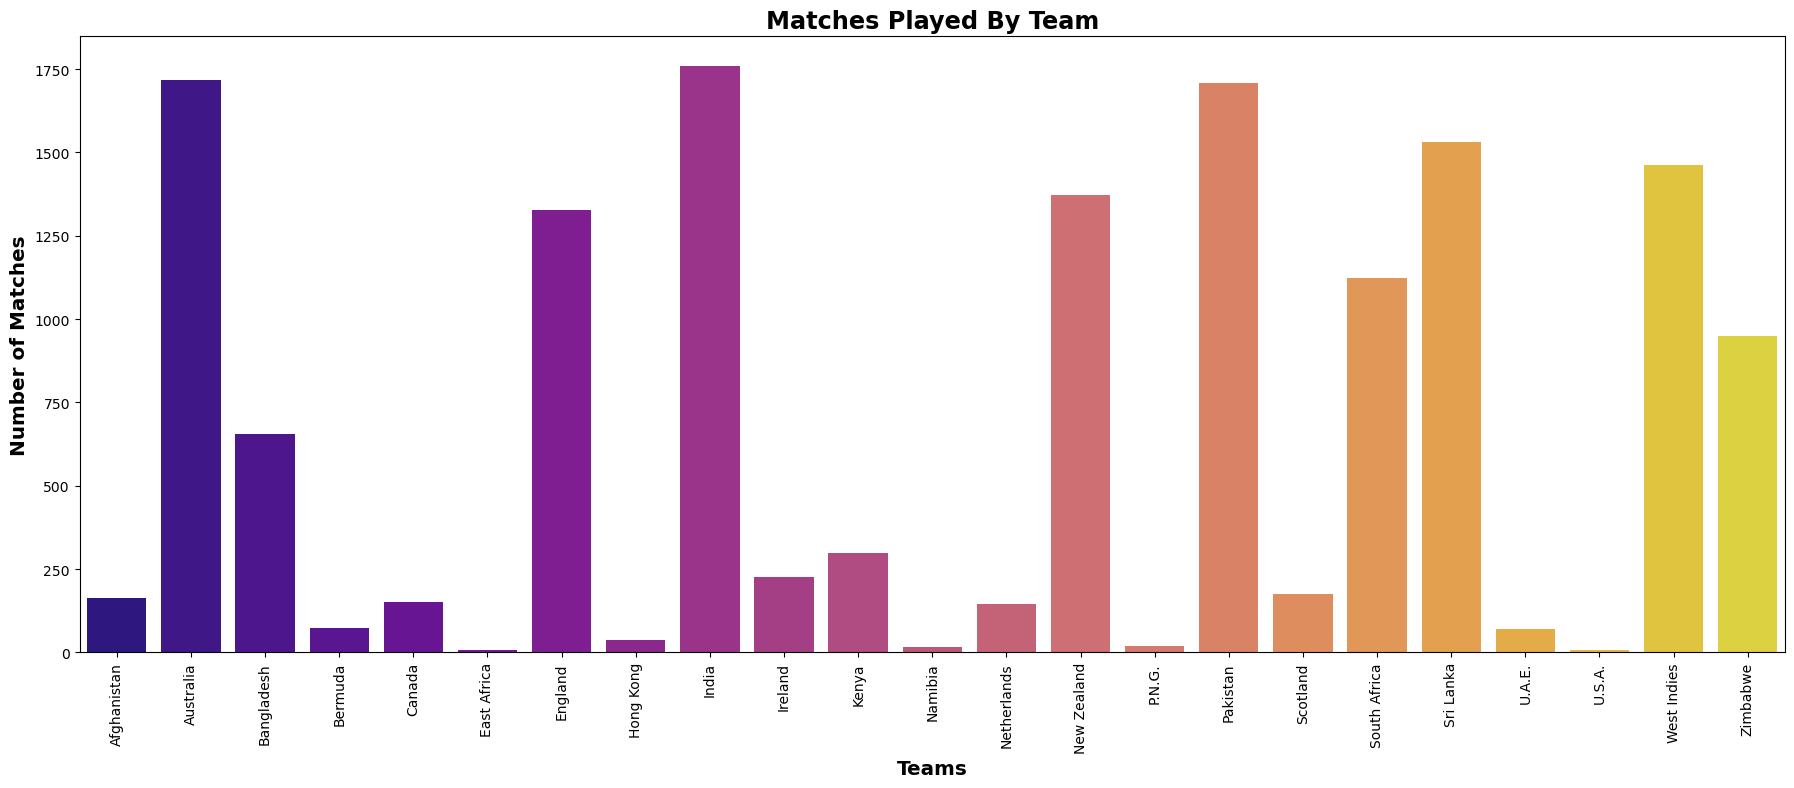

In [9]:
plt.figure(figsize=(22,8))

ax = sns.barplot(y = total_mat['Matches'] , x = total_mat['idx_team'], palette='plasma')
plt.xlabel(xlabel='Teams', fontdict = {'size' : 'x-large', 'fontweight' : 'bold'})
plt.ylabel(ylabel='Number of Matches', fontdict = {'size' : 'x-large', 'fontweight' : 'bold'})
plt.title("Matches Played By Team", fontdict = {'size' : 'xx-large', 'fontweight' : 'bold'})
plt.xticks(rotation=90)
plt.show()

### Insight 2 : India has played most of the matches 

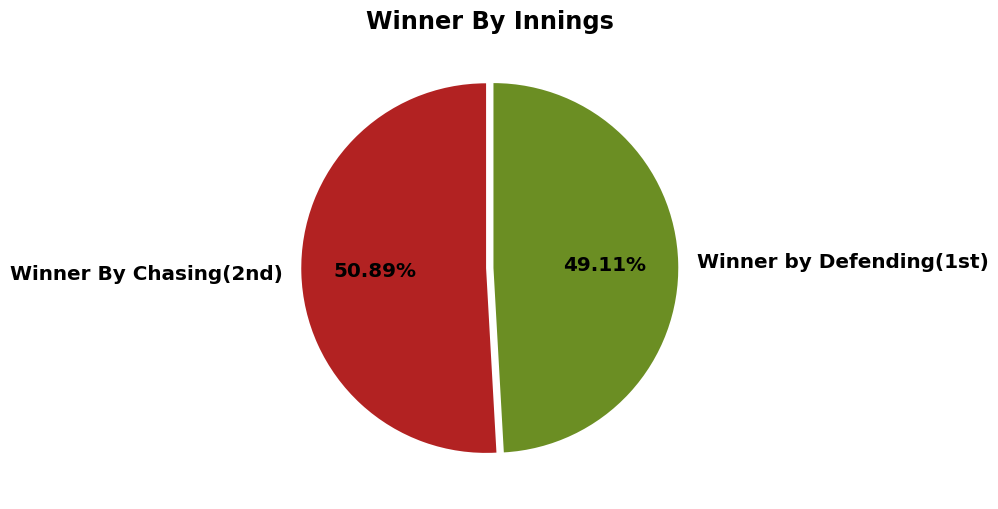

In [10]:
inning = df['Margin'].value_counts().index
win_innings = df['Margin'].value_counts().values

plt.figure(figsize=(8,6))
plt.title("Winner By Innings", fontdict = {'size' : 'xx-large', 'fontweight' : 'bold'})
plt.pie(win_innings, labels=['Winner By Chasing(2nd)', 'Winner by Defending(1st)'], autopct='%0.2f%%',
        colors = ['firebrick', 'olivedrab'], startangle=90, explode = [0.02,0.02], 
        textprops={'color':"black", 'size' : 'x-large', 'fontweight' : 'bold'})
plt.show()

### Insight 3: Team that chases(bats 2nd) has a slight advantage over team that defends(bats 1st) .This suggests that teams have a better chance of winning if they bat second .

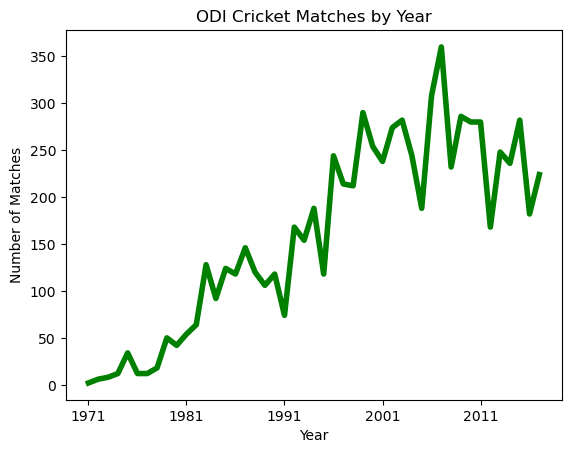

In [11]:
df['Year'] = df['Match Date'].str[-4:]

yeared=df.groupby("Year").size()
yeared.plot(kind="line",color="green",linewidth=4)
plt.title("ODI Cricket Matches by Year")
plt.ylabel("Number of Matches")
plt.show()

### Insight 4 : The number of ODI matches played has increased over time.

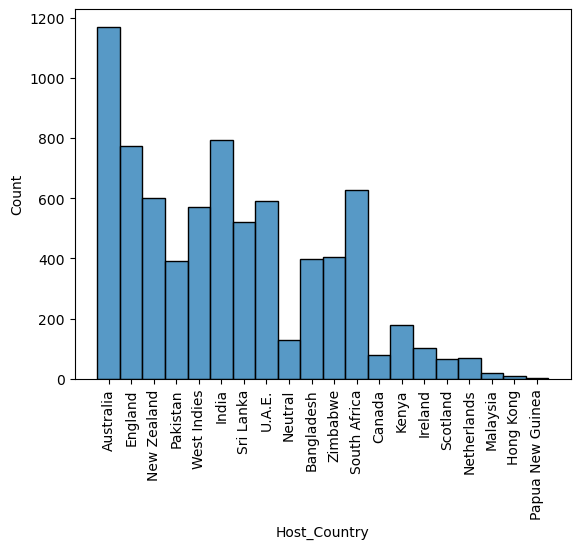

In [12]:
sns.histplot(x=df['Host_Country'])
plt.xticks(rotation=90)
plt.show()

### Insight 5: Most of the matches were hosted by Australia

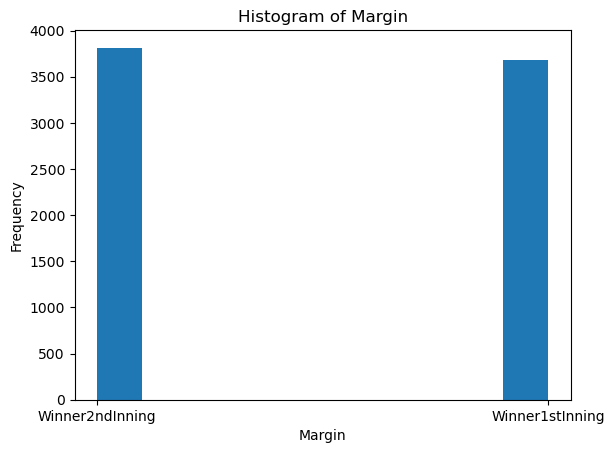

In [13]:
frequency_table = df['Margin'].value_counts()
plt.hist(df['Margin'], bins=10)
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.title('Histogram of Margin')
plt.show()

### Insight 6 : the frequency of the margin of victory for the winning team in the 2nd inning is higher than the frequency of the margin of victory for the winning team in the 1st inning. 

## 2.Bivariate analysis 

<Axes: xlabel='Margin', ylabel='Winner'>

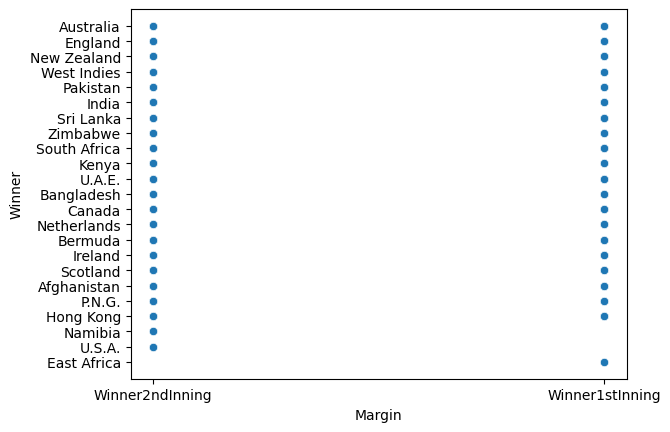

In [14]:
sns.scatterplot(x='Margin', y='Winner', data=df)

## Insight 1 :the winner of the first inning has a higher margin than the winner of the second inning

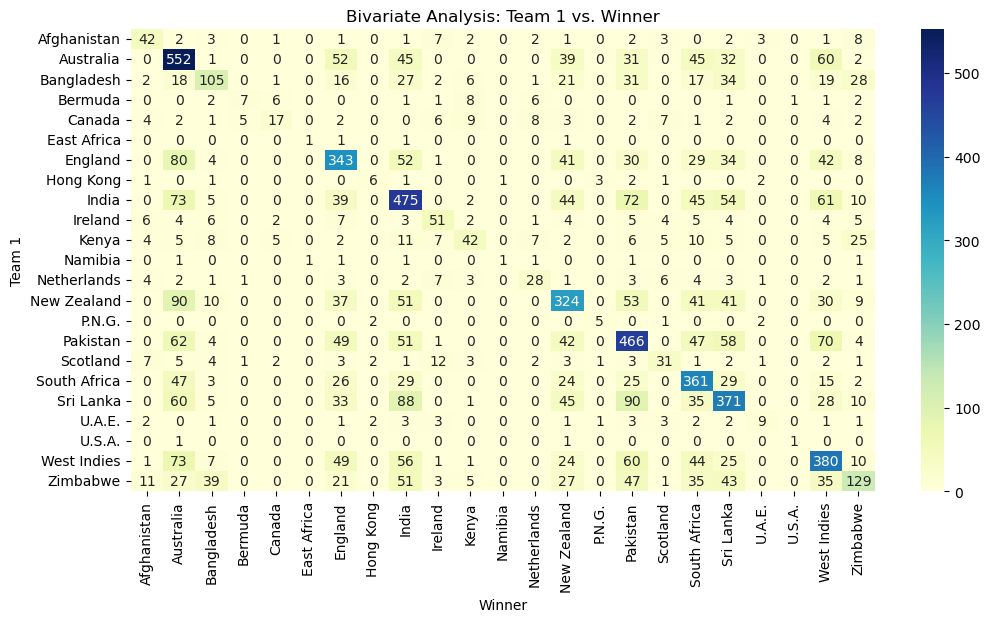

In [15]:
cross_tab = pd.crosstab(df['Team 1'], df['Winner'])
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Bivariate Analysis: Team 1 vs. Winner')
plt.xlabel('Winner')
plt.ylabel('Team 1')
plt.show()


### Insight 2 : There is a positive correlation between the number of matches played and the number of matches won.

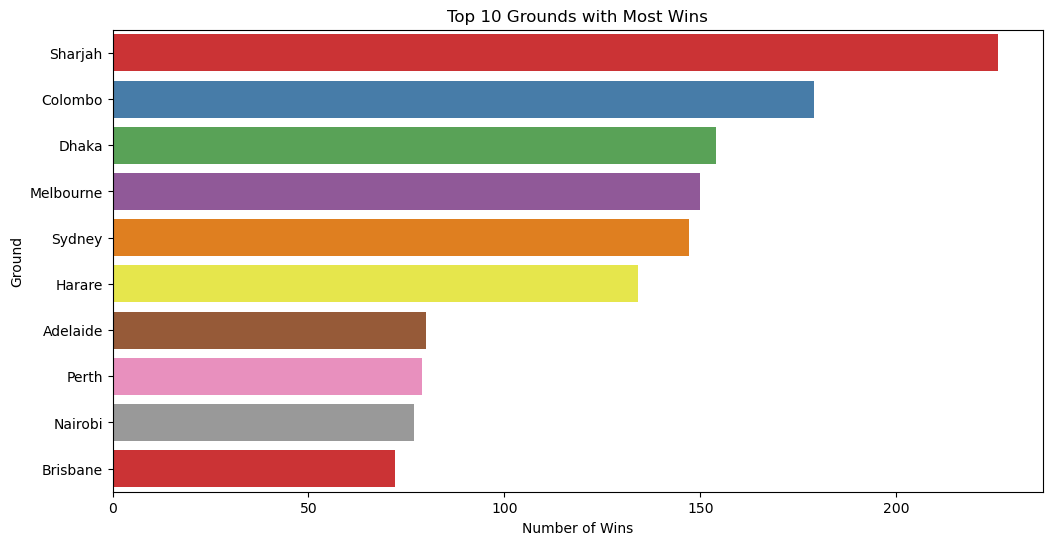

In [16]:
# Grouping the data by 'Ground' and count the number of wins for each ground
ground_wins = df[df['Winner'] == df['Team 1']]['Ground'].value_counts().reset_index()
ground_wins.columns = ['Ground', 'Wins']

# Sorting the data to get the top 10 grounds with the most wins
top_10_grounds = ground_wins.head(10)

# bar chart to visualize the top 10 grounds
plt.figure(figsize=(12, 6))
sns.barplot(x='Wins', y='Ground',data=top_10_grounds, palette='Set1')
plt.title('Top 10 Grounds with Most Wins')
plt.xlabel('Number of Wins')
plt.ylabel('Ground')
plt.show()

### Insight 3 :Sharjah has the most wins, followed by Colombo and Dhaka 1.The least number of wins is in Brisbane 

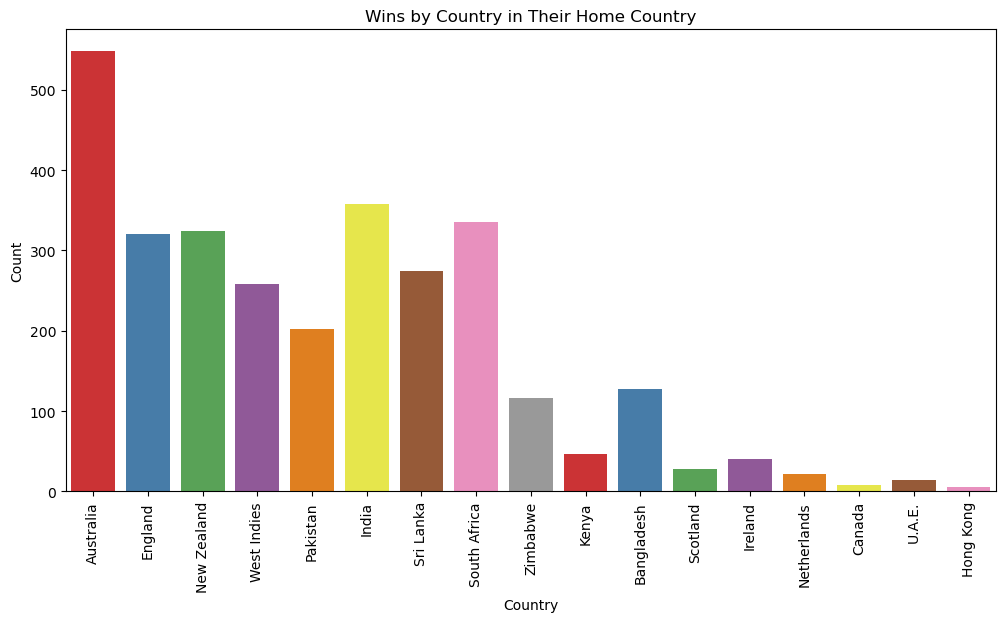

In [17]:
home_country_wins = df[df['Host_Country'] == df['Winner']]

#countplot to visualize the number of wins by each country in their home country
plt.figure(figsize=(12, 6))
sns.countplot(x='Winner', data=home_country_wins, palette='Set1')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Wins by Country in Their Home Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

### Insight 4 : Australia, England, and New Zealand have the highest number of wins in their home country, while Hong Kong and U.A.E. have the lowest number of wins in their home country 

## 3. Multivariate analysis 

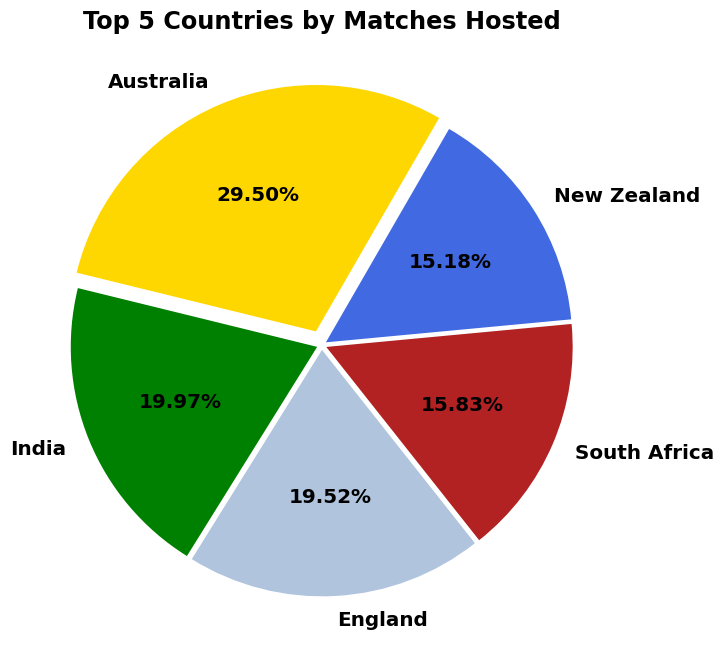

In [18]:
colors=["gold","green","lightsteelblue","firebrick","royalblue"]
country = df['Host_Country'].value_counts().head().index
mat_count = df['Host_Country'].value_counts().head().values

plt.figure(figsize=(10, 8))
plt.title("Top 5 Countries by Matches Hosted", fontdict = {'size' : 'xx-large', 'fontweight' : 'bold'})
plt.pie(mat_count, labels=country, autopct='%0.2f%%',
        colors = colors, startangle=60, explode = [0.06,0.02,0.02,0.02,0.02], 
        textprops={'color':"black", 'size' : 'x-large', 'fontweight' : 'bold'})
plt.show()

### Insight 1 : Australia has hosted the most matches, followed by India and England. New Zealand and South Africa have hosted the least matches 1

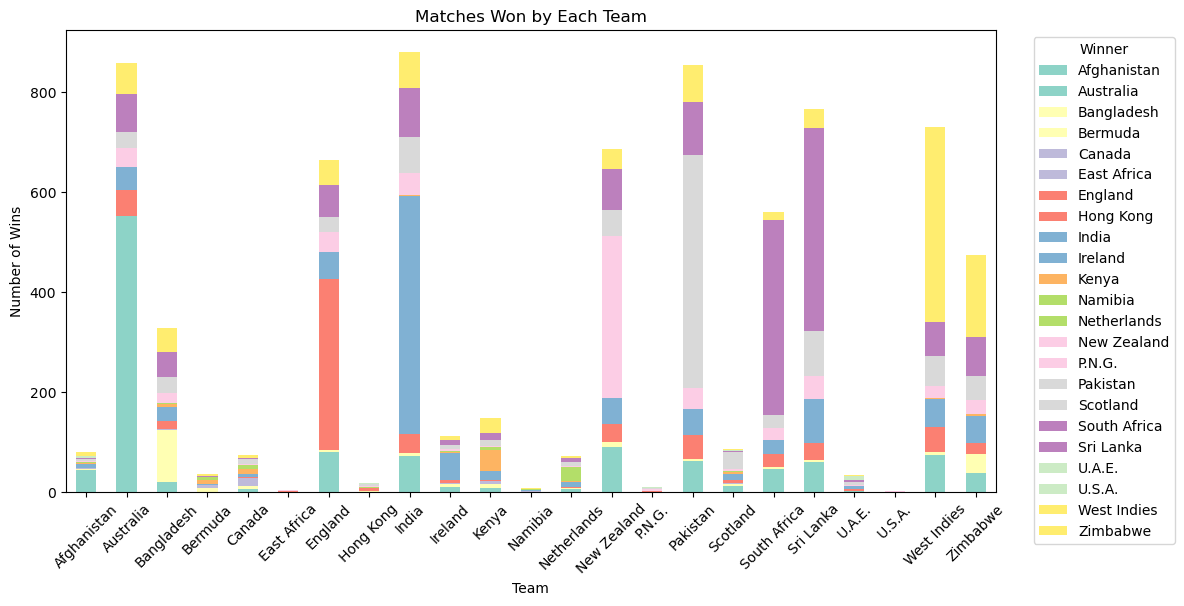

In [19]:
team_winner_counts = df.groupby(['Team 1', 'Winner']).size().unstack(fill_value=0)

# bar plot to visualize the number of matches won by each team
plt.figure(figsize=(12, 6))
team_winner_counts.plot(kind='bar', stacked=True, colormap='Set3', ax=plt.gca())
plt.title('Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.legend(title='Winner', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

### Insight 2 : The highest number of matches won is by India followed by Australia and England. The lowest number of matches won is by Bermuda

C:\Users\SHILPA G\AppData\Local\Temp\ipykernel_26236\857155355.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


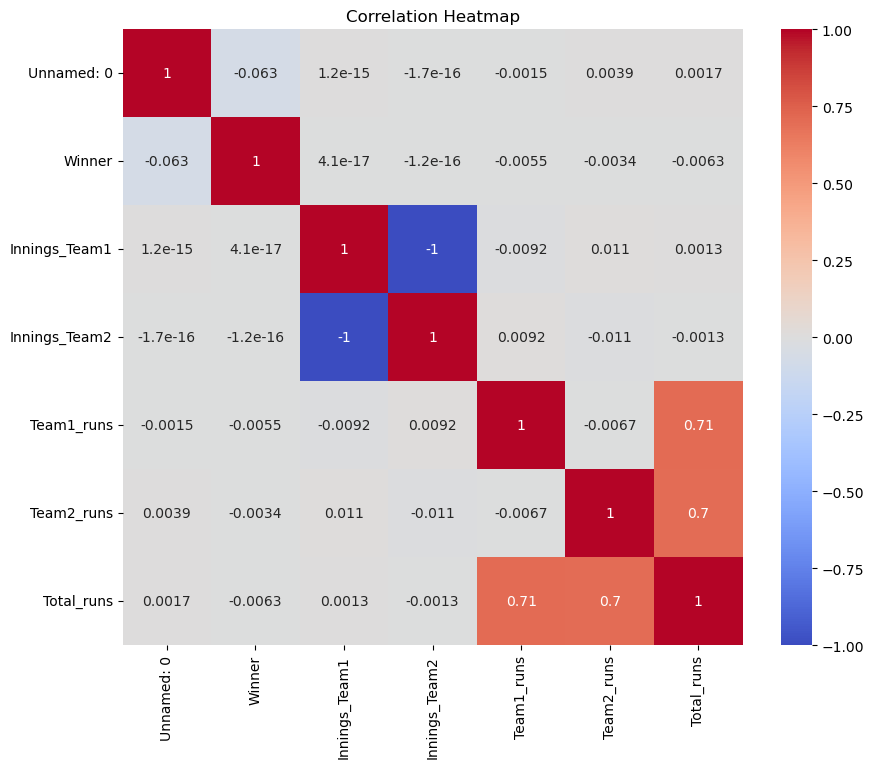

In [24]:
corr_matrix = df.corr()

# heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Insight 3 :Team1_runs and Total_runs are positively correlated, Innings Team1 and Innings Team2 are negatively correlated, Winner and Team1_runs are positively correlated,Winner and Team2_runs are also positively correlated.

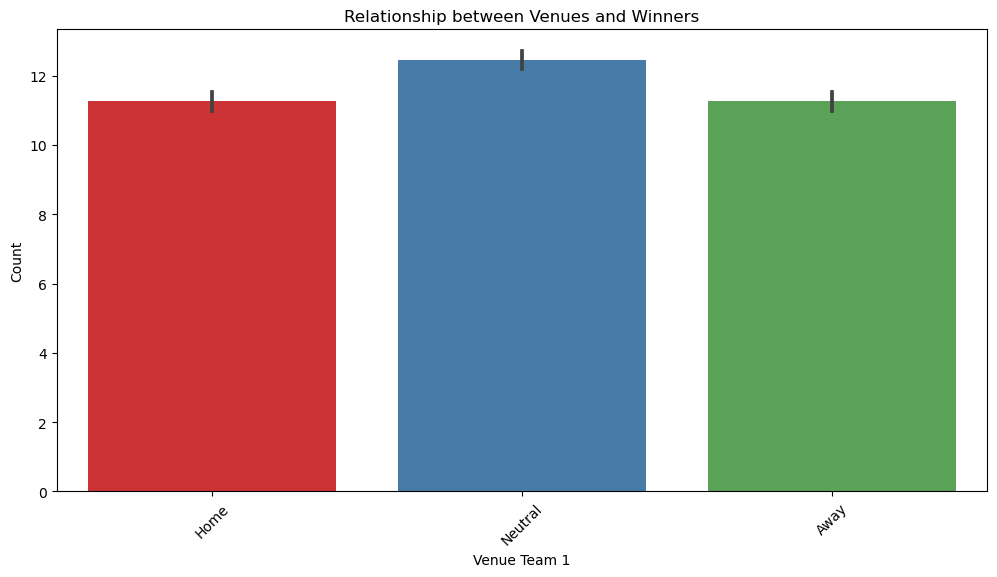

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Venue_Team1', y='Winner', data=df, palette='Set1')
plt.title('Relationship between Venues and Winners')
plt.xlabel('Venue Team 1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Insight 4 : The neutral team has a higher count of wins than the home team, with the away team having the lowest count of wins

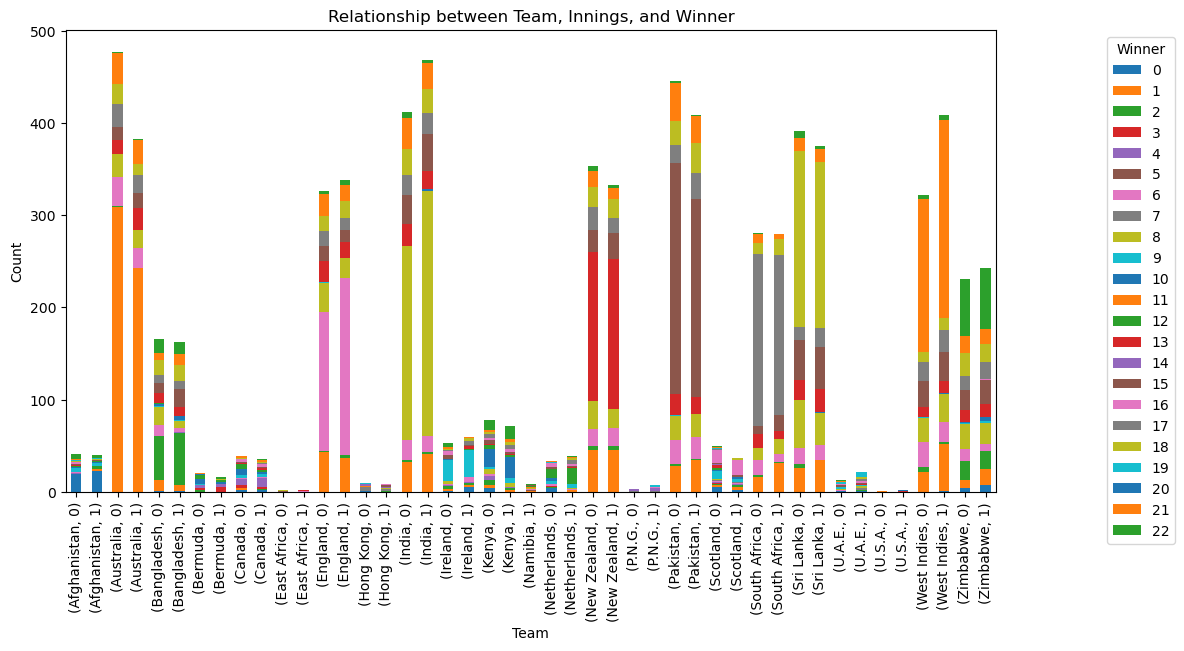

In [22]:
team_innings_winner = df.groupby(['Team 1', 'Innings_Team1', 'Winner']).size().unstack(fill_value=0)

# stacked bar graph
team_innings_winner.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relationship between Team, Innings, and Winner')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Winner', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

### Insight 5 : The team that wins the first innings is more likely to win the match, regardless of which team bats first. 